### Please complete the following sections sequentially to complete this assignment.

##### <span style="color:red">Note: You can create as many code or markdown cells as you deem necessary to answer each question. However, please leave the problems unchanged. We will evaluate your solutions by executing your code sequentially.</span> 
---

**Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates (See this [article](https://yello.co/blog/what-is-campus-recruitment/) for more information). Our dataset revolves around the placement season of a Business School in India, where it has various factors on candidates getting hired, such as work experience, and exam percentages.** 

**<span style="color:red">The objective of this assignment is to predict a student's recruitment status. </span> The assignment's dataset is included in the homework's zipped folder. Table below has the description of each variable in the dataset.**

| Variable       | Description                                              |
|----------------|----------------------------------------------------------|
| sl_no          | Serial Number                                            |
| gender         | Gender- Male='M',Female='F'                              |
| ssc_p          | Secondary Education percentage- 10th Grade               |
| ssc_b          | Board of Education- Central/ Others                      |
| hsc_p          | Higher Secondary Education percentage- 12th Grade        |
| hsc_b          | Board of Education- Central/ Others                      |
| hsc_s          | Specialization in Higher Secondary Education             |
| degree_p       | Degree Percentage                                        |
| degree_t       | Under Graduation(Degree type)- Field of degree education |
| workex         | Work Experience                                          |
| etest_p        | Employability test percentage ( conducted by college)    |
| specialisation | Post Graduation(MBA)- Specialization                     |
| mba_p          | MBA percentage                                           |
| __status (Target)__| Status of placement- Placed/Not placed                   |
| salary         | Salary offered by corporate to candidates                |

---
### Data Exploration

**Note: Before starting the assignment, import all necessary libraries and read the dataset into the Python environment.**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay, auc, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

**1- Explore the data by creating <span style="color:red">three </span> meaningful visualizations and interpreting them. Write your interpretations in a markdown cell. (30 pts)**

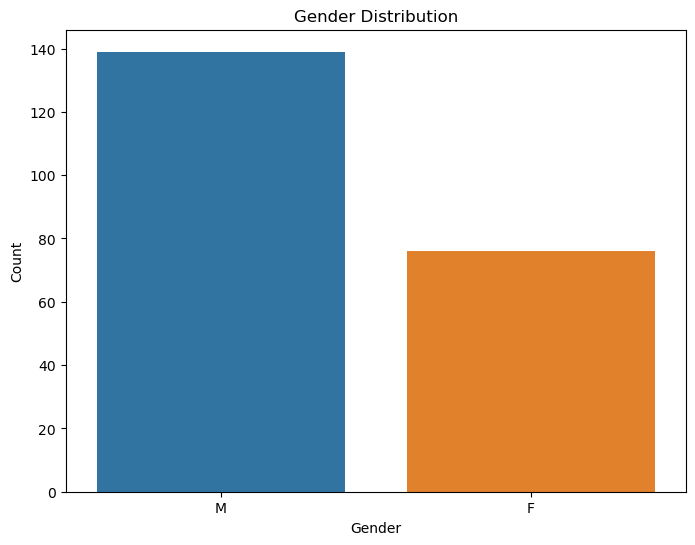

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
#This shows the distribution of male and female candidates.

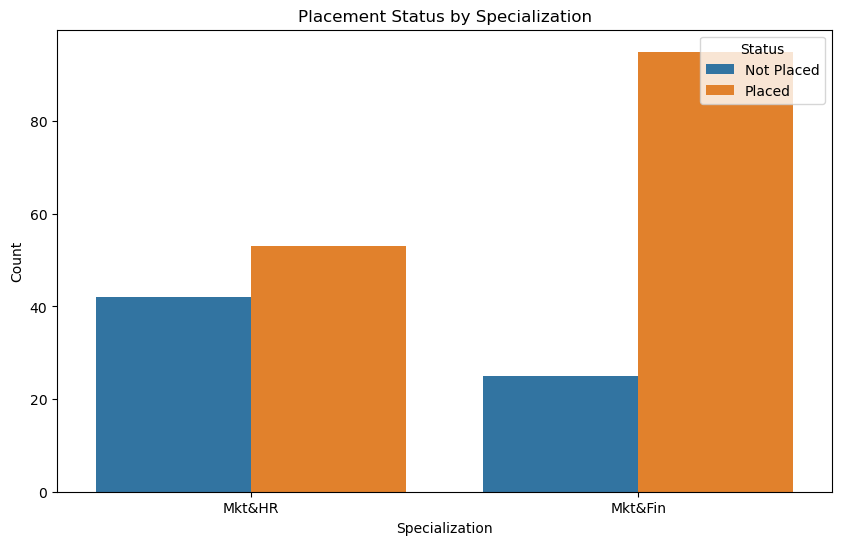

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='specialisation', hue='status')
plt.title('Placement Status by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right', labels=['Not Placed', 'Placed'])
plt.show()

In [ ]:
#This shows how the placement status varies depending on the specialization. It helps identify a relationship between each.

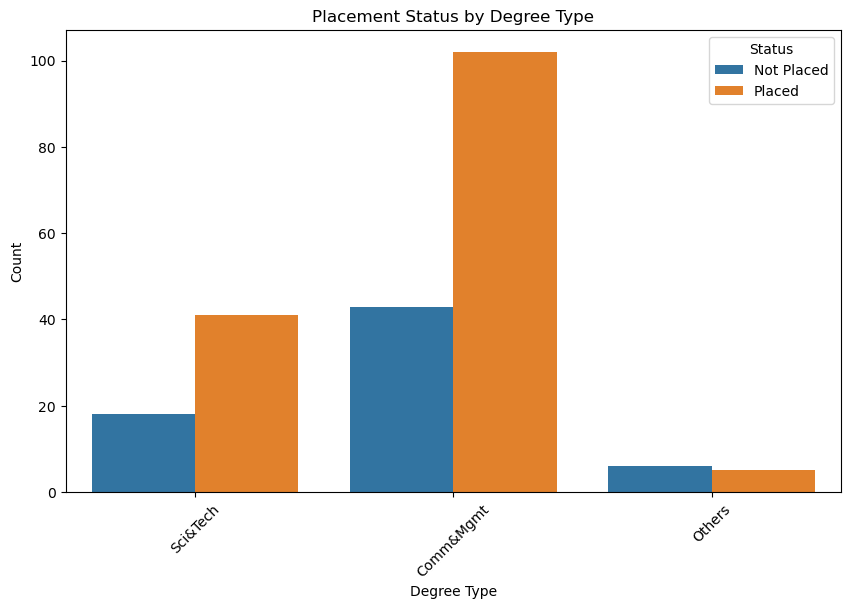

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='degree_t', hue='status')
plt.title('Placement Status by Degree Type')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right', labels=['Not Placed', 'Placed'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#This shows how the placement status varies depending on the type of undergraduate degree.

**2- Explore the data by creating <span style="color:red">three </span> meaningful summary tables and interpreting them. Write your interpretations in a markdown cell. (30 pts)**

In [17]:
gender_summary = df.groupby('gender')[['ssc_p', 'hsc_p', 'degree_p', 'mba_p']].describe()
gender_summary

ssc_p                                                        hsc_p  \
        count       mean        std    min   25%    50%   75%   max  count   
gender                                                                       
F        76.0  68.310921  11.522542  40.89  62.5  69.75  77.0  88.0   76.0   
M       139.0  66.752518  10.429150  41.00  60.2  65.00  74.0  89.4  139.0   

                   ... degree_p        mba_p                              \
             mean  ...      75%   max  count       mean       std    min   
gender             ...                                                     
F       66.646842  ...     73.0  91.0   76.0  64.643553  5.242545  53.29   
M       66.161655  ...     70.1  83.0  139.0  60.984892  5.750263  51.21   

                                       
           25%     50%     75%    max  
gender                                 
F       60.710  64.805  68.675  76.18  
M       56.875  60.440  64.245  77.89  

[2 rows x 32 columns]

In [ ]:
#This shows how academic performance varies by gender.

In [18]:
specialization_summary = df.groupby('specialisation')['status'].value_counts(normalize=True).unstack()
specialization_summary

status,0,1
specialisation,,
Mkt&Fin,0.208333,0.791667
Mkt&HR,0.442105,0.557895


In [ ]:
#This table shows placement rates for each specialization. It identifies which specialization has the best placement rate.

In [19]:
workex_summary = df.groupby('workex')['status'].value_counts(normalize=True).unstack()
workex_summary

status,0,1
workex,,
No,0.404255,0.595745
Yes,0.135135,0.864865


In [ ]:
#This table shows the impact that work experience has on placement. 

---
### Introduction to Logistic Regression

**3- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3909f88a-d46e-47aa-b66f-acba01516f90) for an intorudction to logistic regression.**

**4- What is a classification problem? Explain in a few sentences. (10 pts)**

A scenario where an output has a limited number of classes instead of a continuous interval is a classification problem. An example would be a question for customers where the only two answer choices are "Yes" and "No". 

**5- In a few sentences, describe the logistic regression method. (10 pts)**

The logistic regression method is equivalent to using the linear regression for predicting the odds of an observation belonging to the success class. This is the better method to use when dealing with classification problems.

**6- Why is linear regression not suitable for classification problems? (10 pts)**

Linear regression is not suitable for classification problems because it is suited to predict continuous numeric values, not labels/categories. The logistic regression method is better suited for the latter.

**7- How are linear and logistic regression methods related? (10 pts)**

They are similar in that both are regression methods. They are different in their purpose. The linear regression method is for predicting continuous numeric values while the logistic regression method is used to predict classification tasks.

**8- How do we convert a logistic function output to a binary prediction? (5 pts)**

You can do this by choosing a threshold (an example would be 0.5) and if the probability is greater than or equal to, predict positive, otherwise predict negative. 

**9- How do we construct a confusion matrix? Explain by using true positive, false negative, false positive, and true negative concepts. (10 pts)**

A confusion matrix compares predictions to actual outcomes. True positives represent correct, positive predictions. False negatives are incorrect, negative predictions. False positives are incorrect, positive predictions. And true negatives are correct, negative predictions.

**10- Explain <span style="color:red">three </span> performance measures of a classification method. (10 pts)**

The three performance measures are accuracy, precision, and recall. Accuracy measures how correct it is. Precision measures its ability to avoid false positives. And recall measures the ability to capture true positives and minimize false negatives.

---
### ROC Curve

**11- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=07473b07-4bdd-41cd-84b7-acba015d656b) for an intorudction to ROC Curve.**

**12- Briefly explain how an ROC curve is constructed. (10 pts)**

This is constructed by creating a graph that represents the balance between correctly identifying positive cases and mistakenly categorizing negatives as the classfication threshold is adjusted.

**13- How do we use ROC curve to pick a classification method? (10 pts)**

To do this you need to compare the area under the ROC curve across different models. The higher this is, the more confidence you can have in the model's performance.

**14- How does the ROC curve of a purely random classification model look like? (5 pts)**

The ROC curve of a purely random classification model will be at a 45 degree angle on the graph. Essentially, the model is 50/50 when it comes to accurate predictions.

**15- What is Area Under the Curve (AUC) and how is it interpreted? (10 pts)**

The AUC is a metric used to quantify the overall performance of a model's ROC curve. It represents the probability that a model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance. 

---
### Multiple Logistic Regression

**16- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8fdb6a7e-83d7-43da-81a6-acba016761ce) for an intorudction to multiple logistic regression.**

**17- How can we interpret the coefficients of a logistic model? (10 pts)**

You can interpret the coefficients by naming them postive or negative. A positive coefficient indicates an increase in the log-odds, while negative coeffiecients indicate a decrease. 

**18- What are the assumptions of the logistic regression? (10 pts)**

The assumptions are that there is a binary dependent variable, there is independence of operations, that there are little or no multicollinearity, and finally, that there is linearity of independent variables and log odds.

---
### Logistic Regression in Python

**19- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0b9bd021-a506-47c5-b5d8-acbd000cee6e) to learn about implementing logistic regression in Python. The video's dataset is included in the assignment zipped folder, in case you want to replicate the codes.**

**20- Read the campus recruitment data into a DataFrame. The output variable of this dataset is ```status```. We need this variable to have binary (0 and 1) values. However, you will see that it has two classes of ```Placed``` and ```Not Placed```. After reading the data, use the following line of code to replace ```Placed``` with 1 and ```Not Placed``` with 0. (5 pts)**
```
df['status'] = df['status'].replace({'Placed': 1, 'Not Placed': 0})
```

In [7]:
df = pd.read_csv("campus_recruitment.csv")
df['status'] = df['status'].replace({'Placed': 1, 'Not Placed': 0})
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


**21- Check if there are any missing values and take care of them if needed. Note that the ```salary``` variable has some missing values for the students who have not found a job. So you can ignore ```salary```. This means no missing data handling treatment is needed for ```salary```. (10 pts)**

In [8]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**22- Ignoring the ```salary``` variable, detect and eliminate outliers of continuous variables. (10 pts)**

In [6]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [9]:
df_clean = df.copy()
var_list = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
for var in var_list:
    iqr = df_clean.quantile(0.75, numeric_only=True)[var] - df_clean.quantile(0.25, numeric_only=True)[var]
    ub = df_clean.quantile(0.75, numeric_only=True)[var] + 1.5 * iqr
    lb = df_clean.quantile(0.25, numeric_only=True)[var] - 1.5 * iqr
    df_clean = df_clean[(df_clean[var] <= ub) & (df_clean[var] >= lb)]
df_clean

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1,204000.0


**23- Ignoring the ```ssc_b``` and ```hsc_b``` variables, dummy encode all other categorical variables. (10 pts)**

In [11]:
cats = ["gender", "hsc_s", "degree_t", "workex", "specialisation"]
df_cat = pd.get_dummies(df_clean, columns=cats, drop_first=True)
df_cat.head(2)

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,etest_p,mba_p,status,salary,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,67.00,Others,91.00,Others,58.00,55.0,58.80,1,270000.0,True,True,False,False,True,False,True
1,2,79.33,Central,78.33,Others,77.48,86.5,66.28,1,200000.0,True,False,True,False,True,True,False


**24- Check if the data is imbalanced, and choose the proper partitioning technique accordingly. (20 pts)**

In [12]:
df_cat.groupby(by=["status"]).size()

status
0     62
1    144
dtype: int64

In [14]:
#undersampling
df_cat["partition"] = np.random.choice(["train", "test"], df_cat.shape[0], p=[0.8, 0.2])
df_train = df_cat[df_cat["partition"] == "train"]
df_test = df_cat[df_cat["partition"] == "test"]

df_train_1 = df_train[df_train["status"] == 1]
df_train_0 = df_train[df_train["status"] == 0]

under = df_train_1.sample(n=df_train_0.shape[0])

df_train_bal = pd.concat([under, df_train_0])
df_train_bal.groupby(by=["status"]).size()

status
0    45
1    45
dtype: int64

**25- Using continuous variables, check for multicollinearity and eliminate it if existing. (20 pts)**

In [15]:
df_train_bal.head(2)

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,etest_p,mba_p,status,salary,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,partition
193,194,60.0,Central,63.0,Central,56.0,80.00,56.63,1,300000.0,False,False,False,True,False,True,True,train
95,96,73.0,Central,78.0,Others,65.0,95.46,62.16,1,420000.0,True,True,False,False,False,True,False,train


In [16]:
cols = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]

for var in cols:
    output_cols = df_train_bal[[var]]
    
    input_vars = cols.copy()
    input_vars.remove(var)
    
    input_cols = df_train_bal[input_vars]
    
    lm2 = LinearRegression()
    lm2.fit(input_cols, output_cols)
    
    output_pred = lm2.predict(input_cols)
    r2 = r2_score(output_cols, output_pred)
    vif = 1/(1-r2)
    if vif > 4:
        print("VIF of the variable {} is {}".format(var, round(vif, 2)))

**26- Build a logistic regression model that predicts a student's status, using proper input variables (do not use ```salary```, ```ssc_b```, and ```hsc_b```). After creating the model: (50 pts)**
* __plot the ROC curve and confusion matrix,__
* __calculate AUC,__
* __and generate other necessary performance measures of your model, such as accuracy, sensitivity, and specificity.__

In [17]:
df_train_bal.columns

Index(['sl_no', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'etest_p',
       'mba_p', 'status', 'salary', 'gender_M', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR', 'partition'],
      dtype='object')

In [21]:
X_train = df_train_bal[['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
       'mba_p', 'gender_M', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR']]
y_train = df_train_bal[["status"]]
X_test = df_test[['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
       'mba_p', 'gender_M', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR']]
y_test = df_test[["status"]]

logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(solver='liblinear')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC 0.96


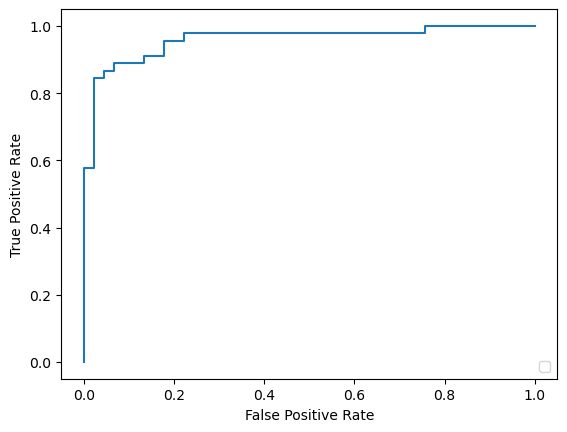

In [27]:
y_test_pred = logreg.predict(X_test)

score = logreg.decision_function(X_train)
fpr, tpr, thresholds = roc_curve(y_train, score)
print("AUC", round(auc(fpr, tpr), 2))

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

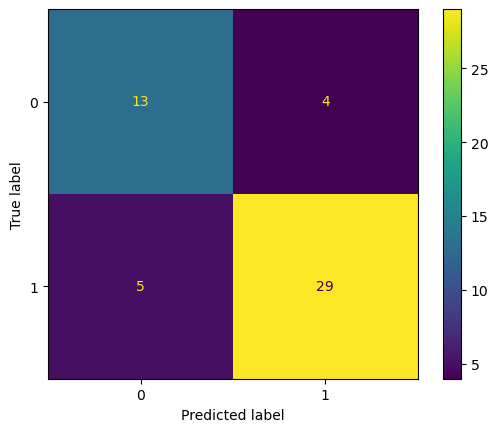

In [33]:
y_test_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.88      0.85      0.87        34

    accuracy                           0.82        51
   macro avg       0.80      0.81      0.80        51
weighted avg       0.83      0.82      0.82        51



**27- Using the permutation method, sort the input variables based on their importance. (20 pts)**

In [41]:
imp_avg = permutation_importance(logreg, X_train, y_train)["importances_mean"]

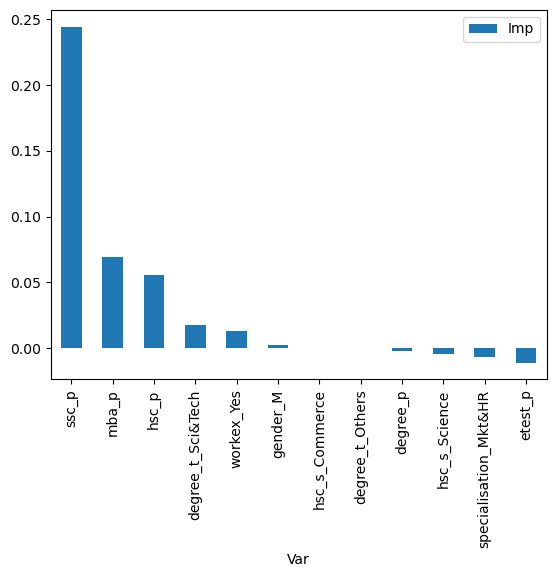

In [42]:
df_imp = pd.DataFrame({"Var": X_train.columns, "Imp": imp_avg}).sort_values(by=["Imp"], ascending=False)
df_imp.plot(x="Var", y="Imp", kind="bar");

**28- Based on your model, what would you suggest to maximize the chance of a student being recruited? (20 pts)**

Based on the model, I would suggest that a student gets a degree in Science & Tech and to also have work experience. These two variables are some of the most important and there is a higher chance of the student being recruited. 

---
### Bonus Question

**29- Based on your model, do you see any evidence of gender bias? Explain. (30 pts)**

In [ ]:
#The model shows slight evidence of gender bias that favors males, as males tend to have a higher placement rate. Based on aviablable data, I can say
# that there may be a gender bias favoring males in the placement outcomes. This issue may be more nuanced than the model shows, but since this is all
# there is to go off of, we can draw this conclusion.